In [37]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


from xgboost import XGBClassifier
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('../data/raw_postpro.csv', encoding='cp949')
# df.head()
# df2 = df[["Machinery", 'Assembly']]
# df2

In [65]:
df['key2'].mode()

0    GASKET
Name: key2, dtype: object

<Axes: xlabel='key2', ylabel='count'>

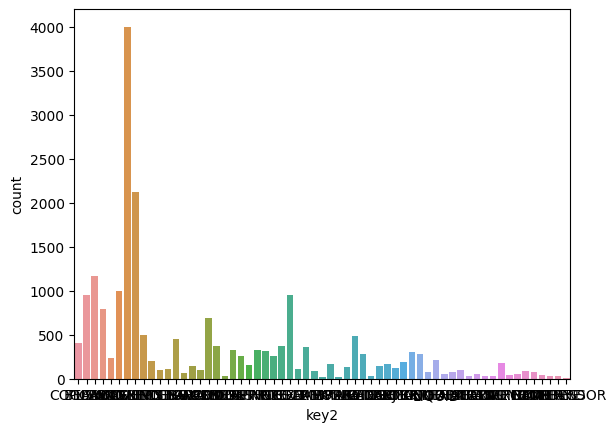

In [66]:
sns.countplot(x='key2', data=df)

In [67]:
grouped_df = df.groupby('key2')
grouped_df.head()
# grouped_df[['Subject','Machinery', 'Assembly', '청구품목']].head()
series1 = grouped_df['청구서번호'].count()
series1.iloc[:,]

key2
ADAPTER     167
ANODES       33
ARM          77
BATTERY      41
BEARING    1167
           ... 
UNIT        282
VALVE       999
WASHER      685
WINCH        33
WIRE        180
Name: 청구서번호, Length: 61, dtype: int64

(0.0, 4200.0)

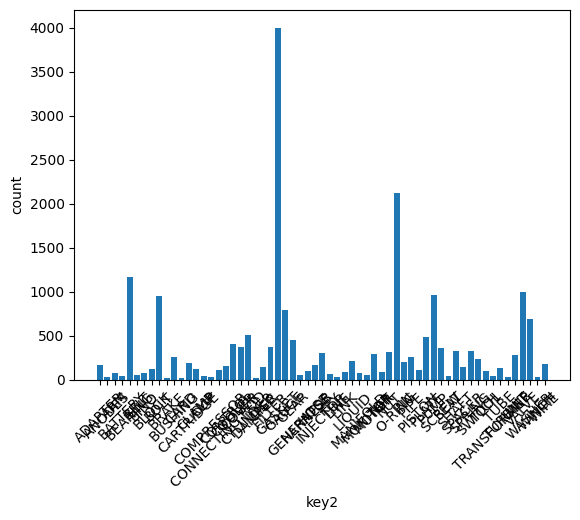

In [42]:

plt.bar(grouped_df['청구서번호'].count().index,grouped_df['청구서번호'].count())
plt.xlabel("key2")
plt.ylabel('count')
plt.xticks(rotation=45)
plt.ylim(0,4200)

In [43]:
def plot_feature(df):
    n_features = df

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# df = pd.read_csv('')
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
# tree_model = Decision
df
# X = df[['Machinery', 'Assembly' ,"청구품목", "Part No.1"]]
X = df[['Machinery', 'Assembly' , "Part No.1","청구품목"]]
# X = df[['Subject','key1','Control No.' ,'Assembly','청구품목']]
# X = df[['발주처','출고운반선' ,'출고선박','청구품목']]
y = df["key2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, shuffle=True, test_size=0.2)

In [100]:
X.iloc[15:21,:]

,Machinery,Assembly,Part No.1,청구품목
15,26,1390,4821,5510
16,26,1390,5134,4916
17,26,1390,5760,5510
18,148,1248,1703,1899
19,148,1248,1703,1887
20,148,1248,1833,2544


In [101]:
y[15:21]

15     4
16     4
17    25
18    25
19    25
20    25
Name: key2, dtype: int32

# CategoricalNB

In [45]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
 
rng = np.random.RandomState(100)
clf = CategoricalNB(alpha=0.1).fit(X_train, y_train) 
## alpha : Laplace Smoothing 파라미터

In [46]:
y_pred = clf.predict(X_train)
y_pred

array([20, 33, 45, ..., 40, 50, 57])

In [47]:
print(clf.get_params()) ## CategoricalNB 클래스 인자 설정 정보
print('정확도 : ', clf.score(X_train,y_train)) ## 성능 평가 점수(Accuracy
print('정확도 : ', clf.score(X_test,y_test)) ## 성능 평가 점수(Accuracy

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
정확도 :  0.968561506123195
정확도 :  0.7775341130604289


In [48]:
clf.score(X_train, y_train)

0.968561506123195

In [49]:
from sklearn.metrics import f1_score
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score
y_pred = clf.predict(X)
mse = mean_squared_error(y, y_pred)


# 모델 예측
y_pred = clf.predict(X_test)

# mse 값 계산
print("MSE: ", mse)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


MSE:  36.343276307452356
F1-score: 0.779383691454742


# OneVsRestClassifier

# LogisticRegression

## Tree

In [19]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

df = pd.read_csv('../data/raw_postpro.csv', encoding='cp949')

df = df.apply(preprocessing.LabelEncoder().fit_transform)
X = df[['Machinery', 'Assembly' , "Part No.1","청구품목"]]
y = df["key2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, shuffle=True, test_size=0.2)

In [20]:
tree = DecisionTreeClassifier(max_depth=24, random_state= 0) # 트리 생성
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test,y_test))) 

훈련 세트 정확도 : 0.974
테스트 세트 정확도 : 0.755


In [21]:
from sklearn.metrics import f1_score

# 모델 예측
y_pred = tree.predict(X_test)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


F1-score: 0.7540515071387015


## Xgboost : softmax

In [71]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# xgboost 모델 생성
model = xgb.XGBClassifier(objective='multi:softmax', num_class=61)

# 모델 학습
model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8450292397660819


In [72]:
from sklearn.metrics import f1_score

# 모델 예측
y_pred = model.predict(X_test)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


F1-score: 0.843450153794426


In [75]:
test = np.array(['SKIFF BOAT','IMPLANTATION INSTRUMENTS', '15.147', 'GEARBOX OIL PRRSSUR INDAICATOR, P2'])
test = le.fit_transform(test)
test

array([3, 2, 0, 1], dtype=int64)

In [76]:
result_test = model.predict(test)
result_test

XGBoostError: [16:30:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\predictor\cpu_predictor.cc:377: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 4) : Number of columns in data must equal to trained model.

## Xgboost : softprob

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# xgboost 모델 생성
params = {'objective': 'multi:softprob', 'num_class': 61}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
model = xgb.train(params, dtrain)


# 예측 결과 출력
pred_prob = model.predict(dtest)
pred_label = pred_prob.argmax(axis=1)
print('Predicted probabilities:', pred_prob)
print('Predicted labels:', pred_label)


Predicted probabilities: [[0.00140773 0.00071981 0.00083818 ... 0.00267894 0.00074727 0.00152105]
 [0.00128403 0.00104223 0.00118505 ... 0.00537846 0.00508487 0.00149567]
 [0.00021444 0.00016693 0.00019212 ... 0.00047138 0.00095868 0.00018592]
 ...
 [0.0069267  0.00352586 0.00578293 ... 0.01053204 0.00366036 0.00415521]
 [0.00024094 0.00014238 0.00025947 ... 0.00060813 0.00014623 0.00014403]
 [0.002083   0.00056498 0.00073776 ... 0.00179721 0.00057875 0.00057004]]
Predicted labels: [54 33 24 ... 24 25 40]


In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred_label)
print('Accuracy:', accuracy)


Accuracy: 0.7358674463937622


In [35]:
from sklearn.metrics import f1_score

# 모델 예측
# ypred = model.predict(X_test)
pred_prob = model.predict(dtest)
# F1-score 계산
f1 = f1_score(y_test, pred_prob, average='weighted')
print("F1-score:", f1)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets